#Task-05

Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

Dataset :- https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

100% 653M/653M [00:22<00:00, 33.9MB/s]
100% 653M/653M [00:22<00:00, 31.0MB/s]


In [6]:
import zipfile
import pandas as pd

archive_path = 'us-accidents.zip'

with zipfile.ZipFile(archive_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_files')

In [7]:
data = pd.read_csv('/content/extracted_files/US_Accidents_March23.csv')
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


## General data analysis

In [8]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [9]:
data.shape

(7728394, 46)

In [10]:
# Get general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [11]:
# Checking for missing values
data.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [12]:
# Descriptive statistics for numeric columns
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


<ipython-input-13-a8012ce6ee06>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


Text(0.5, 1.0, 'Correlation between numeric variables')

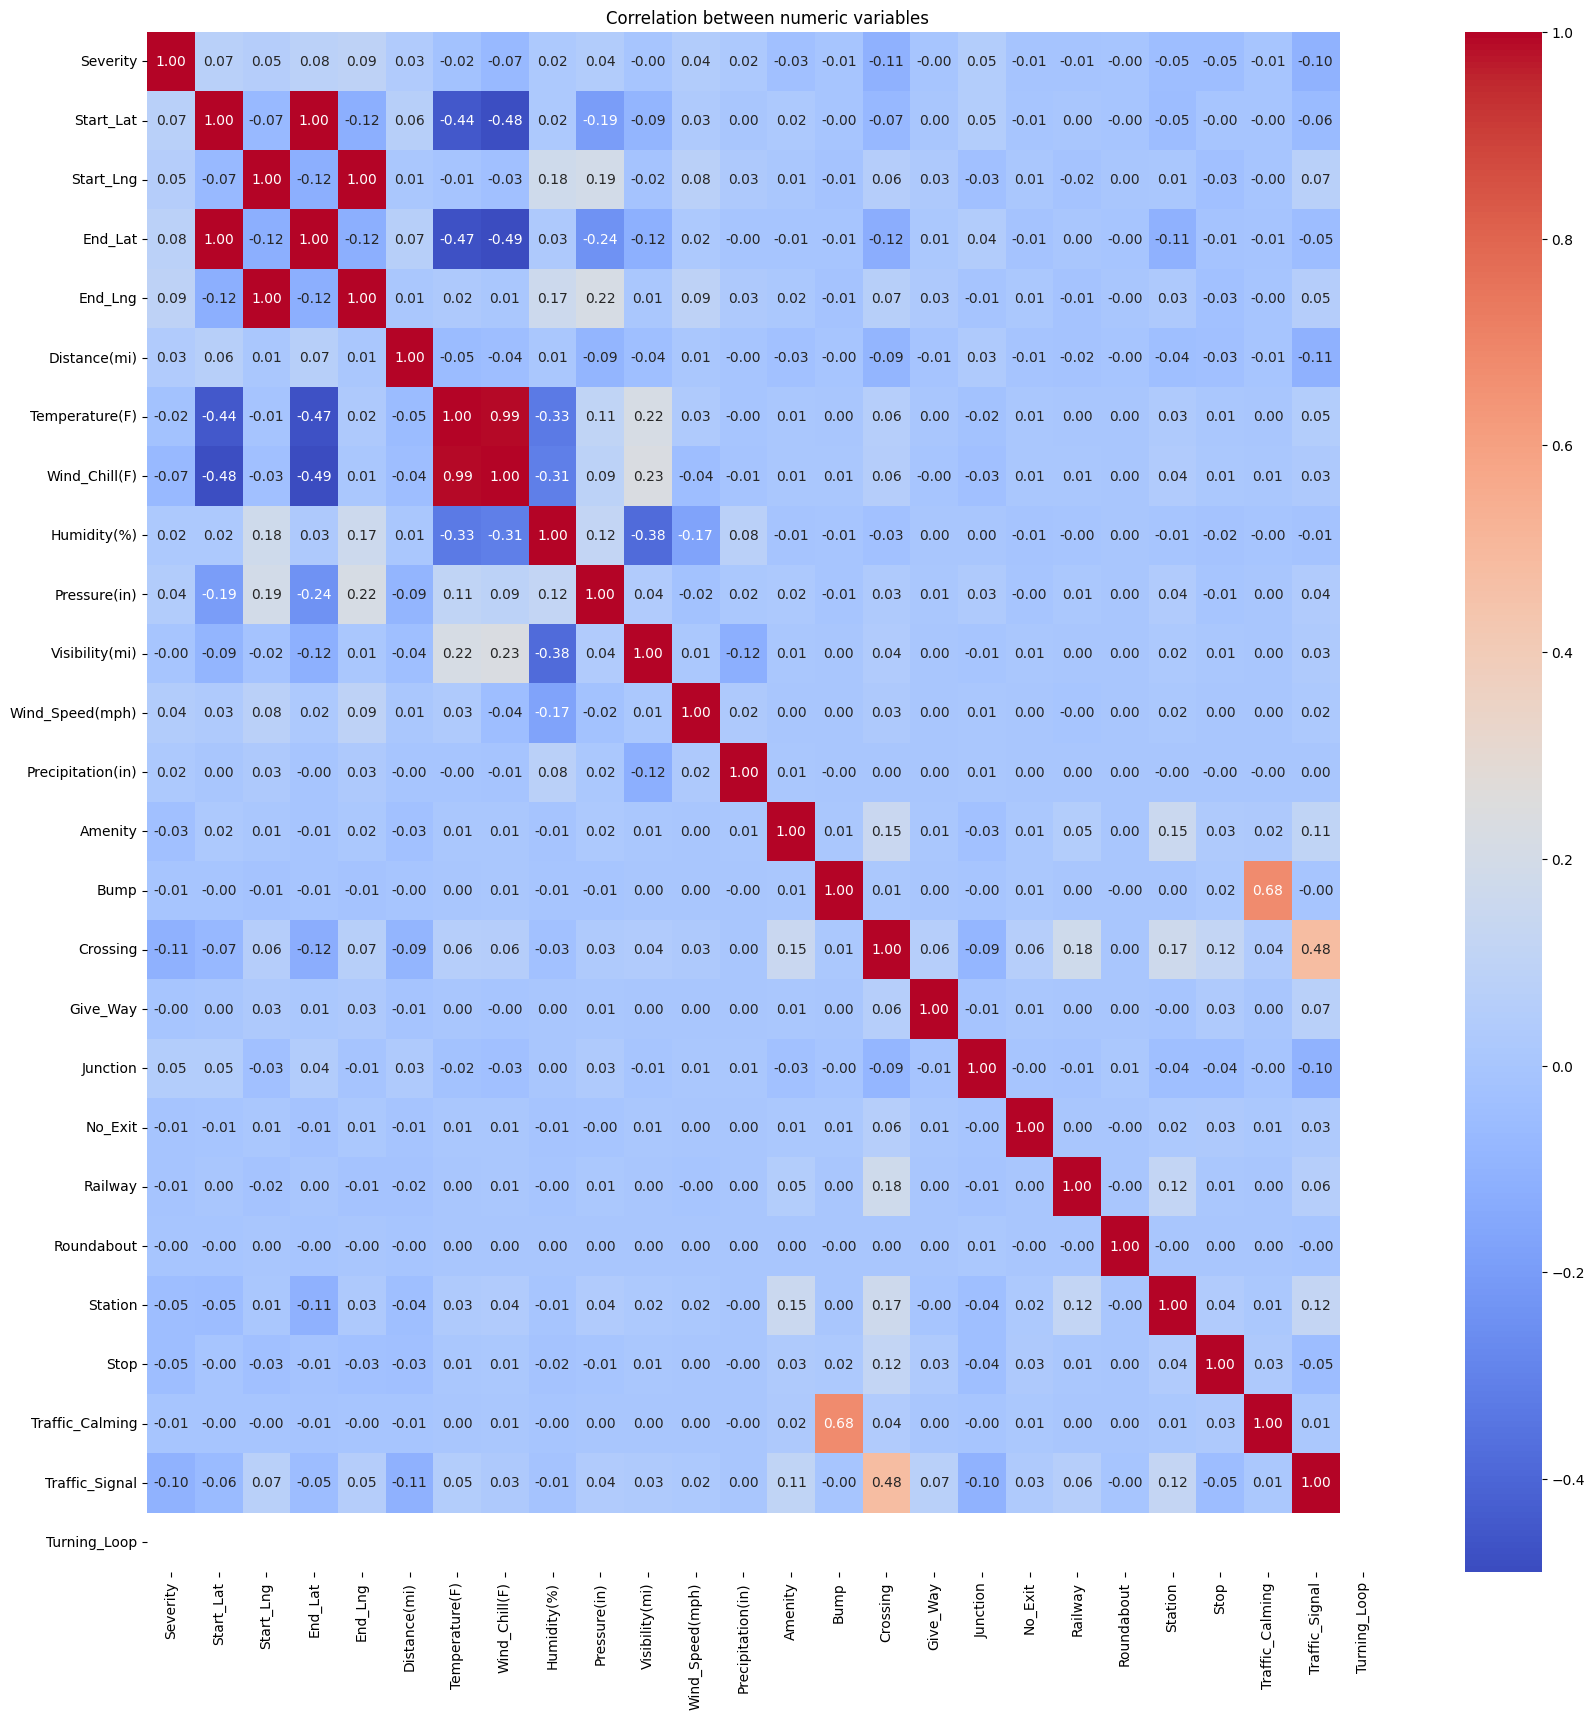

In [13]:
# Correlation between numeric variables
plt.figure(figsize=(20, 20))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation between numeric variables')

##Analysis the distribution of accidents by state

In [14]:
data.State.unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

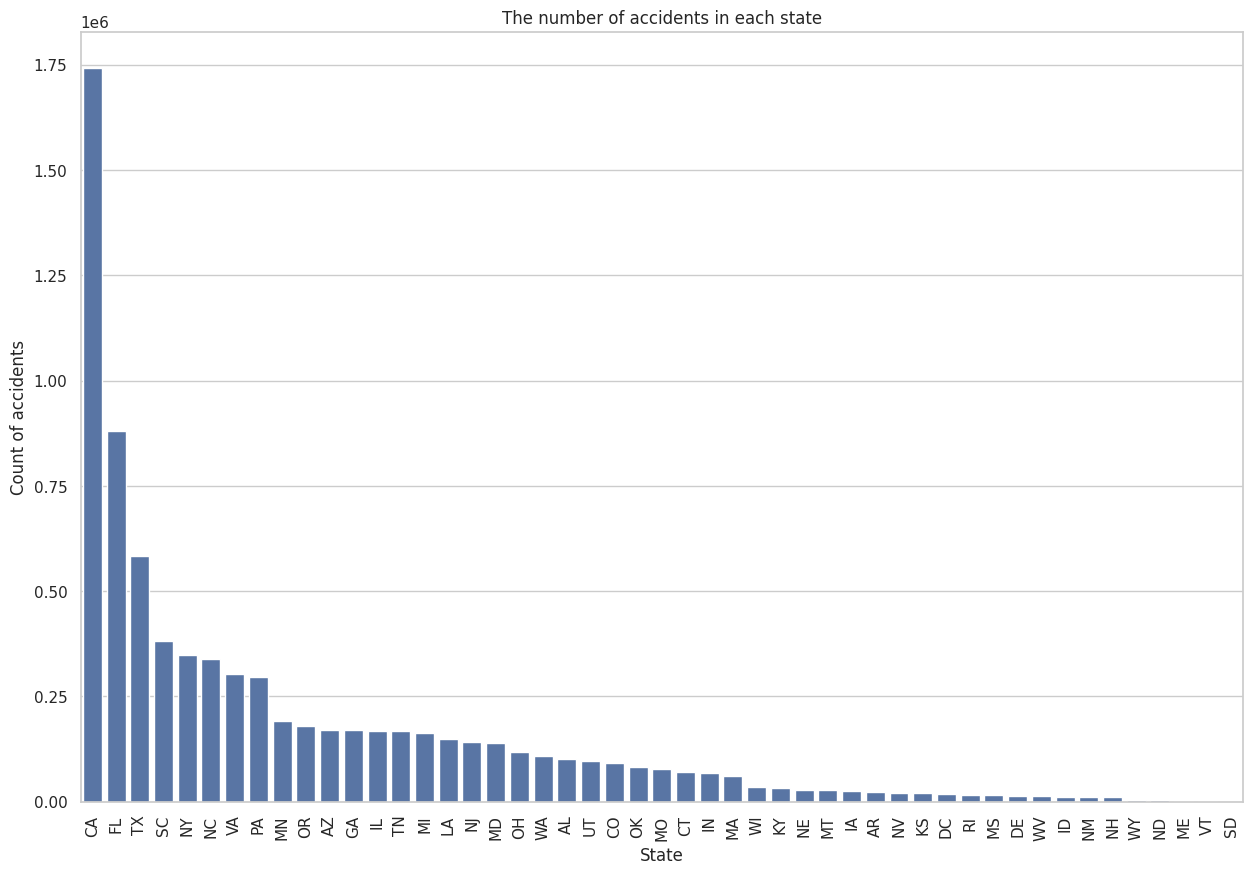

In [15]:
# Creating a bar chart showing the number of accidents in each state
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.barplot(data.State.value_counts())
plt.xticks(rotation=90)
plt.title('The number of accidents in each state')
plt.xlabel('State')
plt.ylabel('Count of accidents');

In [16]:
# Identifying the states with the highest and lowest number of accidents
max_state = data.State.value_counts().sort_values(ascending=False)[:1]
max_state

CA    1741433
Name: State, dtype: int64

In [17]:
min_state = data.State.value_counts().sort_values()[:1]
min_state

SD    289
Name: State, dtype: int64

In [18]:
# Identifying reasons for these differences
states = data[(data['State'] == 'CA') | (data['State'] == 'SD')]
states.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
728,A-729,Source2,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085300,-122.233017,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
729,A-730,Source2,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.631813,-122.084167,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
730,A-731,Source2,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.896564,-122.070717,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
731,A-732,Source2,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334255,-122.032471,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
732,A-733,Source2,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.250729,-121.910713,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day


In [19]:
numerical_columns = [column for column in data.columns if data[column].dtype not in [object, bool]]
numerical_columns

['Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

In [20]:
data[numerical_columns].head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,39.865147,-84.058723,NaN,NaN,0.01,36.9,NaN,91.0,29.68,10.0,NaN,0.02
1,2,39.928059,-82.831184,NaN,NaN,0.01,37.9,NaN,100.0,29.65,10.0,NaN,0.00
2,2,39.063148,-84.032608,NaN,NaN,0.01,36.0,33.3,100.0,29.67,10.0,3.5,NaN
3,3,39.747753,-84.205582,NaN,NaN,0.01,35.1,31.0,96.0,29.64,9.0,4.6,NaN
4,2,39.627781,-84.188354,NaN,NaN,0.01,36.0,33.3,89.0,29.65,6.0,3.5,NaN


In [21]:
states.groupby('State')[numerical_columns].agg([max, min, np.mean, np.std]).T

State                            CA          SD
Severity          max      4.000000    4.000000
                  min      1.000000    2.000000
                  mean     2.165688    2.442907
                  std      0.406882    0.815024
Start_Lat         max     42.005420   45.934930
                  min     32.542587   42.603180
                  mean    35.630259   43.846642
                  std      2.093458    0.614578
Start_Lng         max   -114.138935  -96.467131
                  min   -124.374965 -104.055850
                  mean  -119.499789  -98.450915
                  std      1.936807    2.427334
End_Lat           max     42.144578   45.934441
                  min     32.542032   42.693770
                  mean    35.652123   43.819529
                  std      2.132085    0.586177
End_Lng           max   -114.139815  -96.398320
                  min   -124.400248 -105.559902
                  mean  -119.460598  -98.457707
                  std      1.920091    2.485327
Distance(mi)      max    227.210007   86.488000
                  min      0.000000    0.000000
                  mean     0.484221    2.700917
                  std      1.353258    8.335410
Temperature(F)    max    207.000000   91.000000
                  min    -29.900000  -12.000000
                  mean    63.900452   51.048611
                  std     13.591201   21.582127
Wind_Chill(F)     max    207.000000   86.000000
                  min    -28.000000  -43.000000
                  mean    62.759760   46.297091
                  std     14.595139   26.919027
Humidity(%)       max    100.000000  100.000000
                  min      1.000000   17.000000
                  mean    58.713811   61.840278
                  std     24.214705   19.665199
Pressure(in)      max     58.390000   30.770000
                  min      0.300000   24.610000
                  mean    29.631270   28.324394
                  std      0.776252    1.045899
Visibility(mi)    max    140.000000   10.000000
                  min      0.000000    0.000000
                  mean     9.089184    9.348100
                  std      2.521921    2.184813
Wind_Speed(mph)   max   1087.000000   41.400000
                  min      0.000000    0.000000
                  mean     6.550965   10.860764
                  std      5.700134    7.396771
Precipitation(in) max     24.000000    0.030000
                  min      0.000000    0.000000
                  mean     0.004074    0.000742
                  std      0.036695    0.004039

### Reasons for these differences

1. Temperature and Climate Conditions:
The average temperature (Temperature(F)) in California is higher than in South Dakota. Higher temperatures can lead to more road activity and more accidents.

2. Road Conditions:
The average distance of crashes (Distance(mi)) in South Dakota is significantly higher than in California. This may be due to differences in geographic conditions and road characteristics between the states.

3. Traffic and Road Conditions:
The state of California has a larger number of highways, large cities, and regional centers compared to South Dakota. This can lead to more traffic congestion and more accidents.

4. Weather conditions:
The data shows that in California, Visibility(mi) values can be lower due to fog, smog, and the like, which increases the risk of accidents.

##Analyzing the relationship between weather conditions and accidents

In [22]:
data['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [23]:
# Number of accidents for different weather categories
weather_categories = {
    'Rain': ['Rain', 'Thunderstorms', 'Drizzle'],
    'Snow': ['Snow', 'Sleet'],
    'Fog': ['Fog', 'Mist'],
    'Clear': ['Clear'],
    'Cloudy': ['Cloudy', 'Overcast'],
    'Other': ['Haze', 'Smoke', 'Tornado', 'Volcanic Ash', 'Sand', 'Dust', 'Squalls', 'Blowing', 'N/A']
}


weather_counts = {category: 0 for category in weather_categories}
for condition in data['Weather_Condition']:
    for category, keywords in weather_categories.items():
        for keyword in keywords:
            if keyword in str(condition):
                weather_counts[category] += 1
                break

weather_counts = dict(sorted(weather_counts.items(), key=lambda x: x[1], reverse=True))
print('Percentage of accidents depending on weather conditions:')
for weather, count in weather_counts.items():
  print(f'{weather}: {round(count / data.shape[0] * 100, 2)}%')

Percentage of accidents depending on weather conditions:
Cloudy: 38.29%
Clear: 10.46%
Rain: 6.97%
Snow: 2.09%
Fog: 1.45%
Other: 1.25%


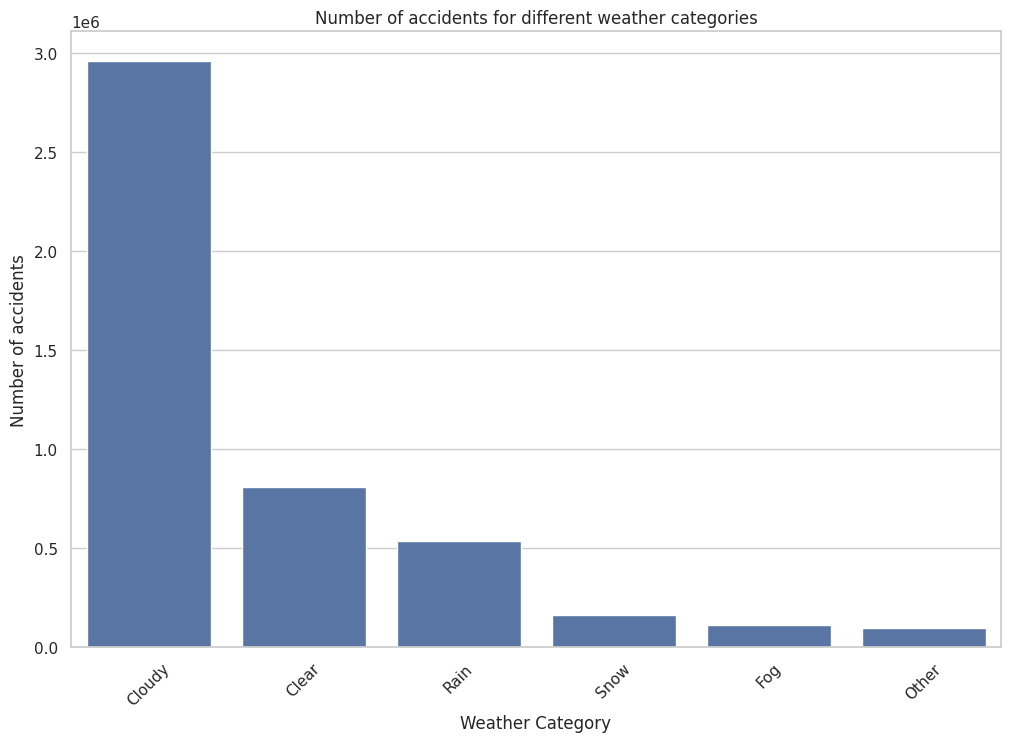

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(x=list(weather_counts.keys()), y=list(weather_counts.values()))
plt.title('Number of accidents for different weather categories')
plt.xlabel('Weather Category')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45)
plt.show()

##Analysis the impact of road conditions on accidents

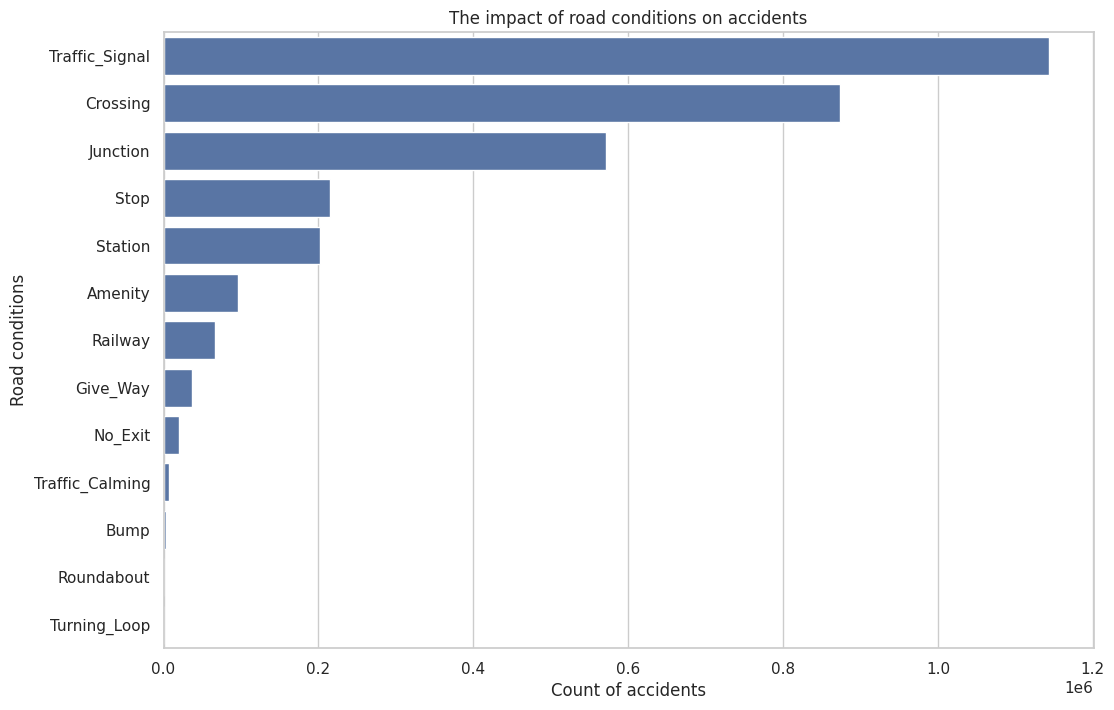

In [25]:
road_conditions = data[['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                        'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']]
road_conditions_sum = road_conditions.sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=road_conditions_sum.values, y=road_conditions_sum.index,)
plt.title('The impact of road conditions on accidents')
plt.xlabel('Count of accidents')
plt.ylabel('Road conditions')
plt.show()

In [26]:
print('5 most frequent road conditions where accidents occurred:')
print(road_conditions_sum [:5])

5 most frequent road conditions where accidents occurred:
Traffic_Signal    1143772
Crossing           873763
Junction           571342
Stop               214371
Station            201901
dtype: int64


### Results:

1. Traffic and signaling (Traffic_Signal): The majority of crashes occur in areas with traffic and signals, which may indicate that intersections and signal systems can be particularly dangerous places to drive.

2. Pedestrian crossings: The second most frequent road condition, indicating the importance of safe crossings for pedestrians and the potential problems at these locations.

3. Junction: Intersections are also a significant contributor to crashes. This can be due to the increased risk of collision due to the intersection of paths.

4. Stop Line: Crashes at stop lines indicate possible problems with traffic enforcement or road surfaces.

5. Station: Crashes near stations may be related to public transportation or high pedestrian traffic.


##Analyzing the relationship between time of day and accidents

In [27]:
data.Start_Time = pd.to_datetime(data.Start_Time)

In [28]:
data.Start_Time.dt.hour

0           5
1           6
2           6
3           7
4           7
           ..
7728389    18
7728390    19
7728391    19
7728392    19
7728393    18
Name: Start_Time, Length: 7728394, dtype: int64

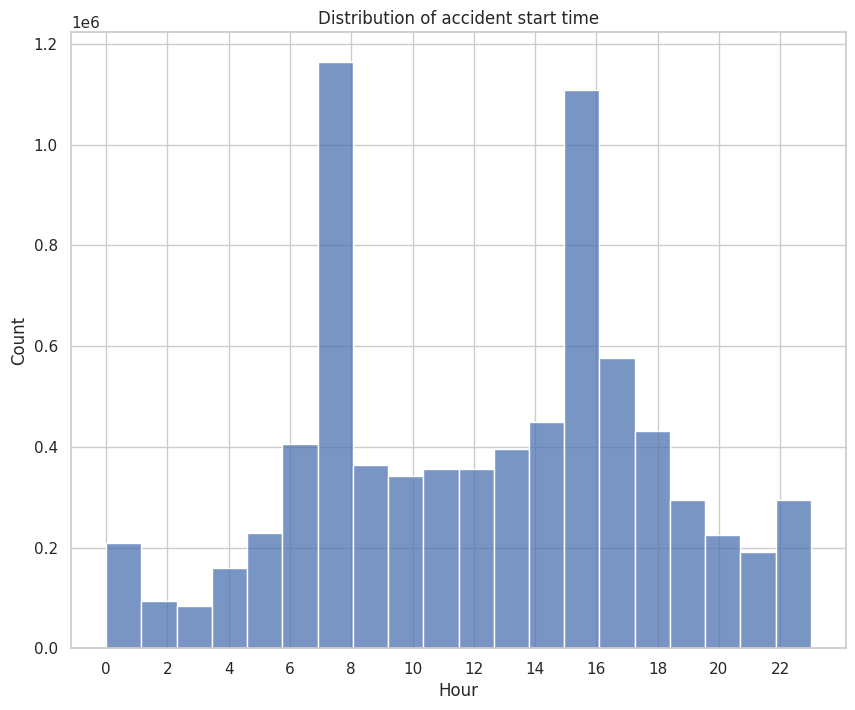

In [29]:
plt.figure(figsize=(10, 8))
sns.histplot(data.Start_Time.dt.hour, bins=20)
plt.title('Distribution of accident start time')
plt.xlabel('Hour')
plt.xticks(np.arange(0, 24, 2));

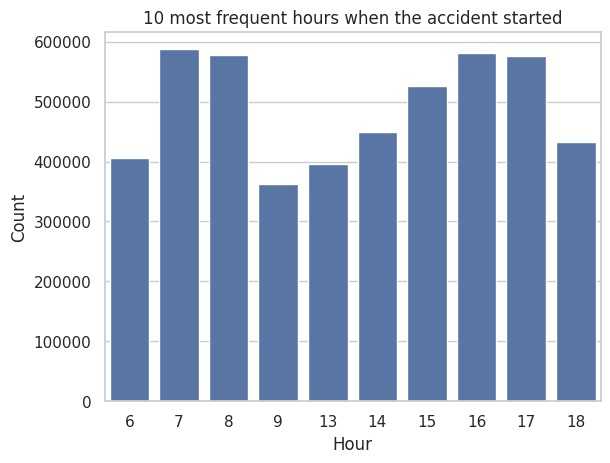

In [38]:
sns.barplot(data.Start_Time.dt.hour.value_counts().sort_values(ascending=False)[:10])
plt.title('10 most frequent hours when the accident started')
plt.ylabel('Count')
plt.xlabel('Hour');

##Visualizing accident hotspots and contributing factors

In [106]:
location_data = round(data[['Start_Lat', 'Start_Lng', 'City']], 2)
accident_counts = location_data.groupby(['Start_Lat', 'Start_Lng']).size().reset_index(name='Accident_Count')
sorted_accident_counts = accident_counts.sort_values('Accident_Count', ascending=False)[:100]

In [107]:
sorted_accident_counts

,Start_Lat,Start_Lng,Accident_Count
13770,28.45,-81.47,3847
273672,40.85,-73.93,3291
1304,25.89,-80.16,3112
86992,33.94,-118.10,3005
273671,40.85,-73.94,2940
...,...,...,...
57088,32.78,-96.78,1565
90926,34.04,-118.28,1564
90932,34.04,-118.22,1563
1073,25.81,-80.31,1557


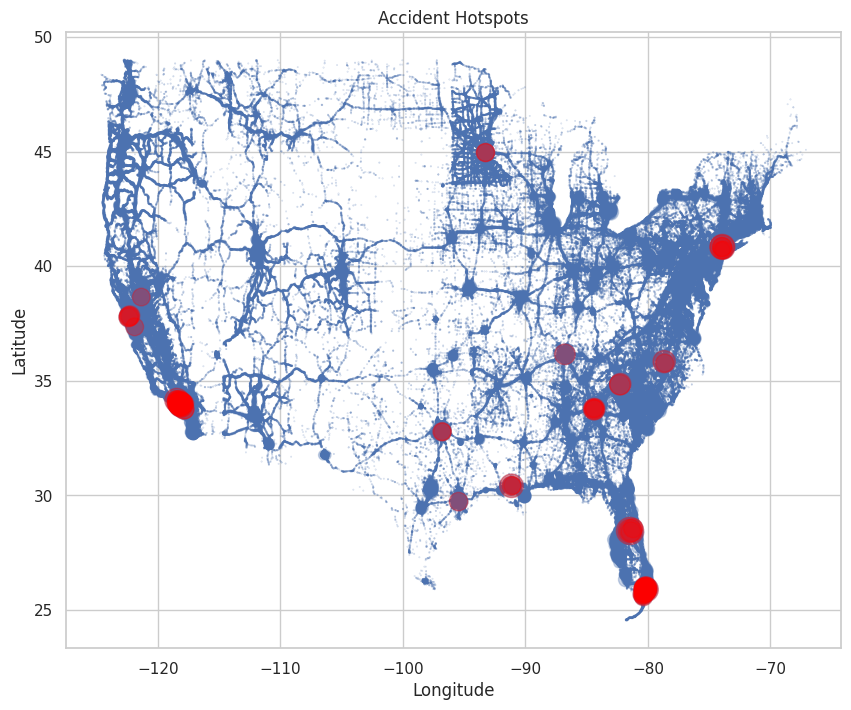

In [108]:
plt.figure(figsize=(10, 8))
plt.scatter(accident_counts['Start_Lng'], accident_counts['Start_Lat'],
            s=accident_counts['Accident_Count']*0.1, alpha=0.3)
plt.scatter(sorted_accident_counts['Start_Lng'], sorted_accident_counts['Start_Lat'],
            s=sorted_accident_counts['Accident_Count']*0.1, c='red', alpha=0.3)
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [104]:
cities = data.groupby(['City']).size().reset_index(name='Accident_Count')
sorted_cities = cities.sort_values('Accident_Count', ascending=False)[:10]
sorted_cities

,City,Accident_Count
7668,Miami,186917
5560,Houston,169609
6889,Los Angeles,156491
2026,Charlotte,138652
2826,Dallas,130939
9068,Orlando,109733
476,Austin,97359
10005,Raleigh,86079
8282,Nashville,72930
653,Baton Rouge,71588


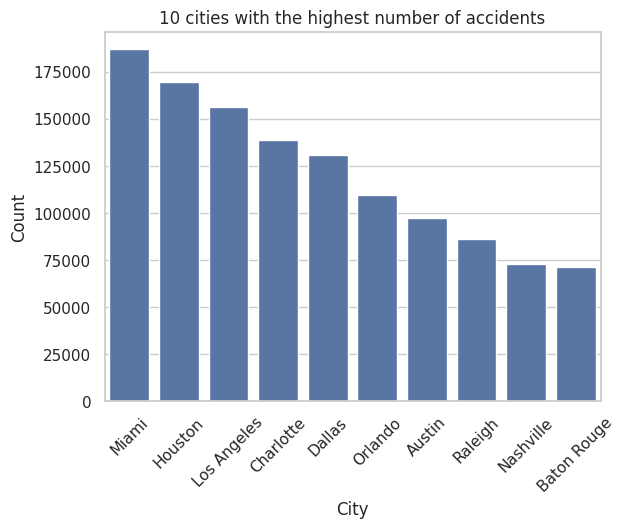

In [105]:
sns.barplot(sorted_cities, x='City', y='Accident_Count')
plt.title('10 cities with the highest number of accidents')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45);

### Based on both the map and the table, it is evident that certain cities experience a higher frequency of accidents compared to others. Here are some conclusions:

1. High-Accident Cities: Miami, Houston, Los Angeles, Charlotte, and Dallas appear to be among the cities with the highest accident counts. These cities have accident counts ranging from approximately 130,000 to nearly 190,000.

2. Urban Centers: Urban centers such as Los Angeles, Houston, and Dallas, which typically have higher population densities and more extensive road networks, tend to exhibit higher accident counts.